# Data Acquisition

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('vehicles.csv')
# View the dataset
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# Data Cleaning

In [3]:
# View data info and shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

(426880, 26)

In [4]:
#Check for and remove duplicates
df.duplicated().value_counts()

False    426880
Name: count, dtype: int64

In [5]:
#Select required columns
output = df[['region', 'price', 'year', 'manufacturer', 'model', 
             'fuel', 'odometer', 'title_status', 'transmission', 
             'condition', 'cylinders', 'drive', 'size', 'type', 
             'paint_color', 'state','image_url', 'lat', 'long', 'posting_date']]
output.to_csv('vehicles2.csv',index=False)

In [6]:
df = pd.read_csv('vehicles2.csv')
df.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,condition,cylinders,drive,size,type,paint_color,state,image_url,lat,long,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN,NaN


There were no duplicate entries in the data. This could also be missleading as the id column could have different numbers but other details are identical.

In [7]:
#Check for duplicates after removing ID column
df.duplicated().value_counts()

False    426845
True         35
Name: count, dtype: int64

In [8]:
#Drop the 35 duplicate columns
df.drop_duplicates(inplace=True)
df.shape

(426845, 20)

In [9]:
#check the posting dates against the geographical positions to filter hotspots.
#view posting date format
df.posting_date

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
426875    2021-04-04T03:21:31-0600
426876    2021-04-04T03:21:29-0600
426877    2021-04-04T03:21:17-0600
426878    2021-04-04T03:21:11-0600
426879    2021-04-04T03:21:07-0600
Name: posting_date, Length: 426845, dtype: object

In [10]:
# change posting date to datetime format and get the day and month
df=df.dropna(subset=['posting_date'],axis=0)
df['postmd'] = pd.to_datetime(df['posting_date'],utc=True).apply(lambda x: x.strftime('%B-%d')
                                                            if not pd.isnull(x) else '')
df['postmd']

27          May-04
28          May-04
29          May-04
30          May-04
31          May-03
            ...   
426875    April-04
426876    April-04
426877    April-04
426878    April-04
426879    April-04
Name: postmd, Length: 426788, dtype: object

In [11]:
df.sort_values(by='postmd')
df.shape

(426788, 21)

Work on the missing data

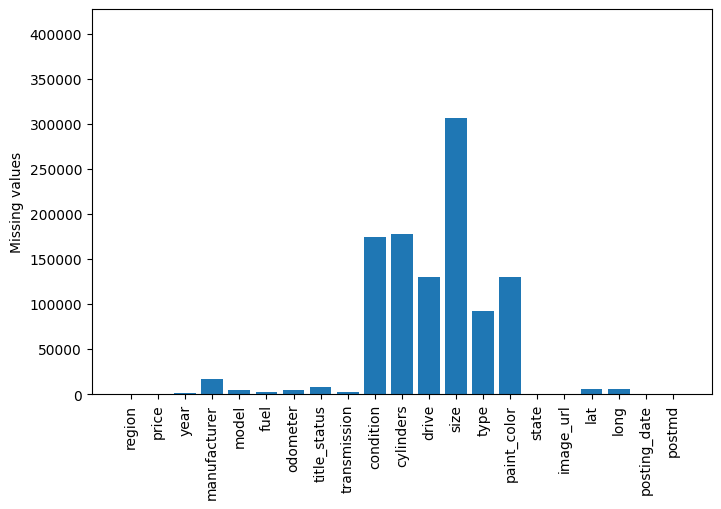

In [12]:

#visualize the missing data
fig, (ax1) = plt.subplots(1,figsize=(8,5))
#bar plot of missing values
ax1.bar(df.columns,df.isna().sum())
ax1.set_ylabel('Missing values')
ax1.set_ylim(0,df.shape[0])
ax1.tick_params('x',labelrotation=90)

Size, condition, cylinders, drive, paint_color, and type have a lot of missing data and since more than 50% of values in the size columns is missing, it will be removed.

In [13]:
#Remove size column 
df.drop(['size'],axis=1,inplace=True)

In [14]:
#drop missing rows in year, model, fuel, odometer, transmission  
#these values are important information and cannot be easily obtained.
df.dropna(subset=['year','model','fuel','odometer','transmission'],axis=0,inplace=True)
df.shape

(412348, 20)

In [15]:
# remove rows with concurrent missing values present in all of the remaining columns
df.dropna(subset=['year','model','fuel','odometer','transmission'],axis=0,inplace=True)
df.shape

(412348, 20)

In [16]:
#keep rows with at least 7 non-NA values
df.dropna(subset=['manufacturer', 'condition', 'cylinders', 'title_status', 
                    'drive', 'type', 'paint_color', 'lat', 'long'], axis=0, thresh=7, inplace=True)
df.shape

(302565, 20)

Search and remove outliers in the columns with numerical values, namely: price and odometer

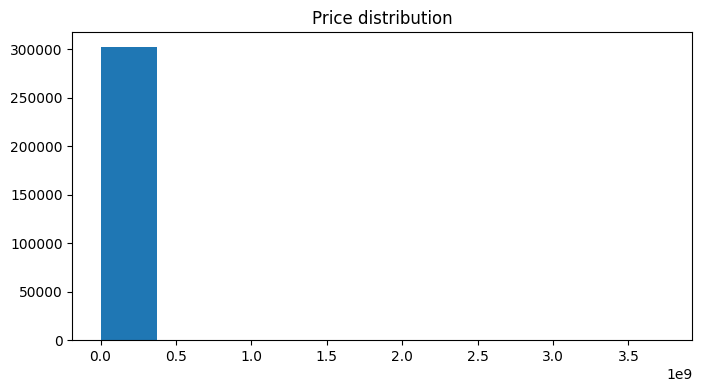

In [17]:
#check the price column for outliers
fig,ax=plt.subplots(figsize=(8,4))
df.price.hist()
plt.title('Price distribution')
plt.grid(False)

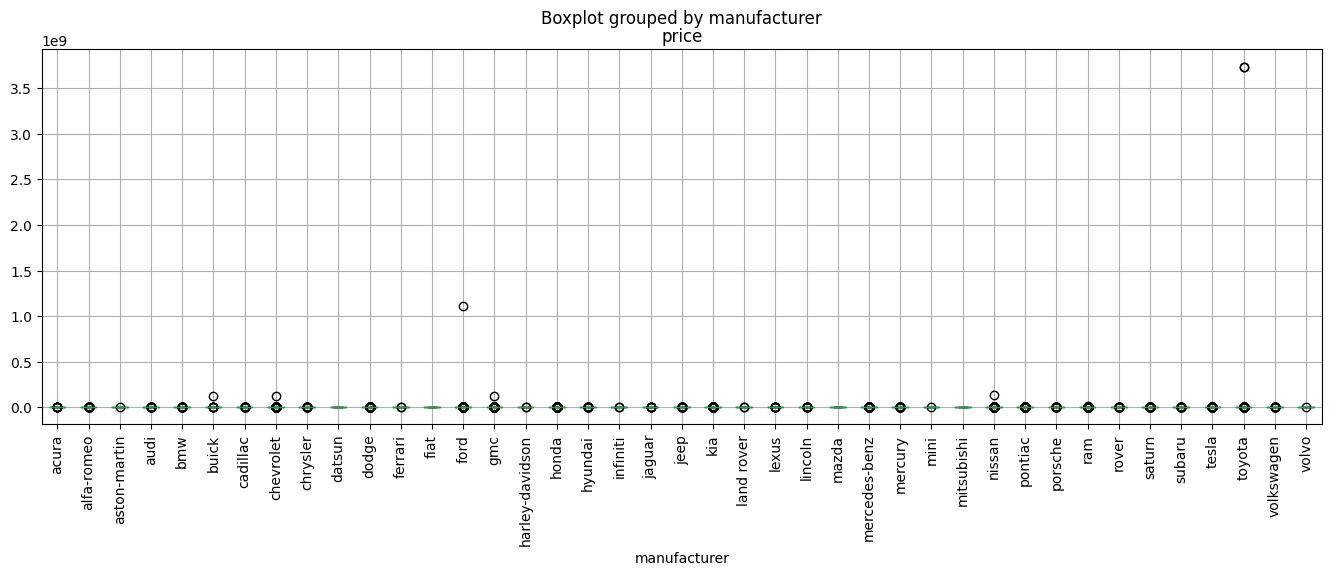

In [18]:
#use boxplots to find outliers
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','manufacturer',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

High price strangely related to ford and toyota yet they are not known for high end luxury or sporting cars.
IT might be an erorr in data enrty or scraping.

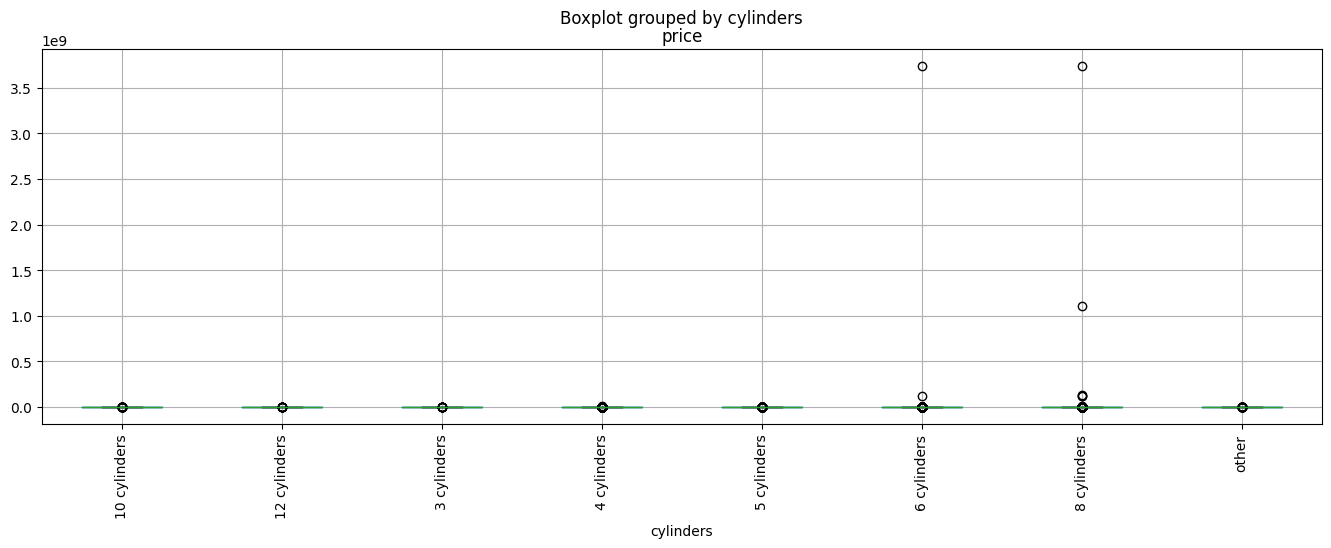

In [19]:
#boxplot grouped according to cylinders
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','cylinders',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

High price related to 6 and 8 cylinder cars which indicate large pickups or sporting cars

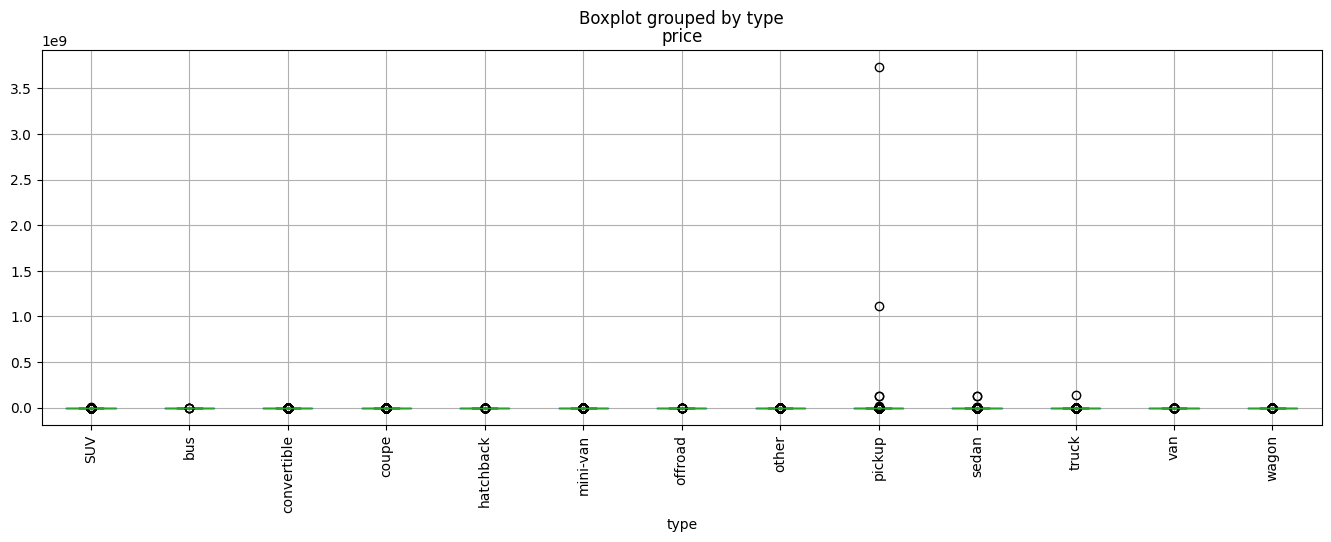

In [20]:
#boxplot grouped according to type
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','type',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

High price strangely related to pickup trucks

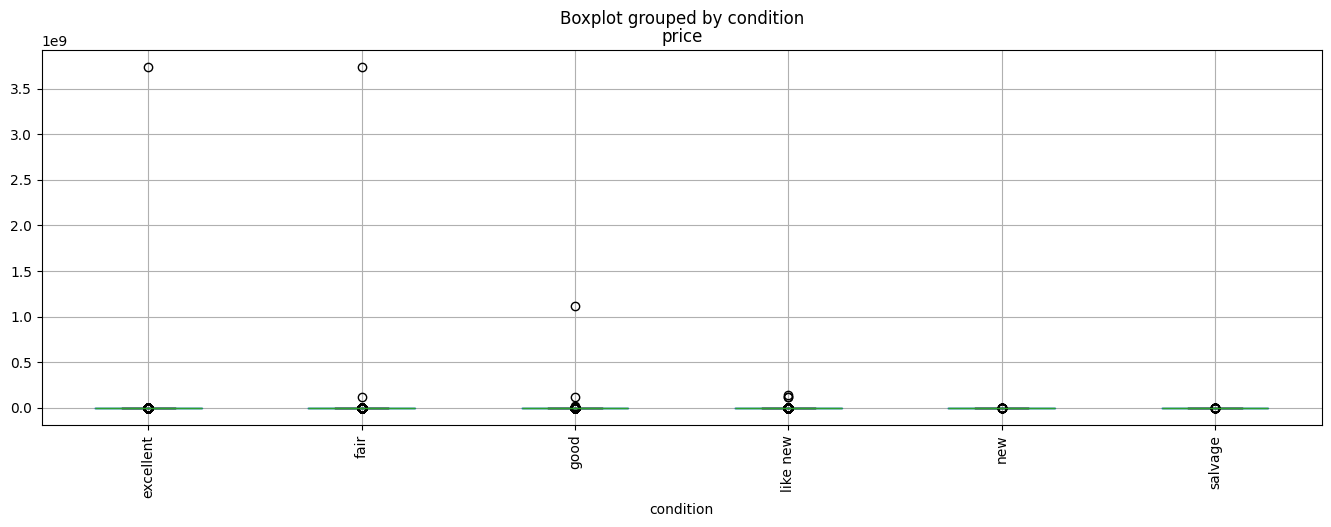

In [21]:
#boxplot grouped according to condition
fig,ax=plt.subplots(1,1,figsize=(16,5))
df.boxplot('price','condition',ax=ax)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

High price not related to new cars

In [22]:
#view the high priced car outliers
outlier=df.loc[((df.price > 500_000) & (df.price < 100_000_000))]
outlier

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,condition,cylinders,drive,type,paint_color,state,image_url,lat,long,posting_date,postmd
68935,ventura county,2000000,2002.0,saturn,l-series l200 4dr sedan,gas,164290.0,clean,automatic,good,4 cylinders,fwd,sedan,green,ca,https://images.craigslist.org/00y0y_hw8QSdnerF...,34.236498,-119.039074,2021-04-06T16:40:31-0700,April-06
95119,ft myers / SW florida,990000,2017.0,mercedes-benz,amg g 63,gas,4085.0,clean,automatic,NaN,8 cylinders,4wd,SUV,white,fl,https://images.craigslist.org/00P0P_4xcfVqDGil...,26.157900,-81.766548,2021-04-24T13:12:08-0400,April-24
105843,orlando,6995495,2014.0,dodge,journey,gas,135888.0,clean,automatic,NaN,4 cylinders,fwd,SUV,NaN,fl,https://images.craigslist.org/01010_d7c56qbQLs...,28.394900,-81.417900,2021-04-28T20:11:41-0400,April-29
106361,orlando,516999,2016.0,NaN,Lambo Aventador SV Roadster,gas,9982.0,clean,automatic,like new,12 cylinders,4wd,convertible,white,fl,https://images.craigslist.org/00n0n_eGPWhFc9Nn...,28.463700,-81.394800,2021-04-26T17:40:47-0400,April-26
136516,spokane / coeur d'alene,17000000,2007.0,ram,2500,diesel,170000.0,rebuilt,automatic,good,8 cylinders,4wd,pickup,black,id,https://images.craigslist.org/01414_gkRWFvHd8y...,47.642227,-117.348404,2021-05-02T19:27:17-0700,May-03
155421,terre haute,1234567,2006.0,jeep,wrangler,gas,123456.0,clean,automatic,like new,6 cylinders,4wd,SUV,custom,in,https://images.craigslist.org/00j0j_1NcNYUY3ww...,38.025845,-87.596457,2021-04-18T11:26:55-0400,April-18
194292,ann arbor,1234567,2010.0,lincoln,mkt ecoboost,gas,85653.0,clean,automatic,like new,NaN,NaN,SUV,custom,mi,https://images.craigslist.org/00000_jJCci6NDXh...,41.381500,-83.650700,2021-04-16T15:15:44-0400,April-16
208617,saginaw-midland-baycity,554900,2019.0,NaN,f250 xlt crewcab,gas,25365.0,lien,automatic,excellent,8 cylinders,4wd,pickup,white,mi,https://images.craigslist.org/00U0U_gbHHsMui1m...,43.637500,-84.197900,2021-05-02T18:30:41-0400,May-02
219241,southwest MS,1111111,1970.0,dodge,challenger,gas,42000.0,clean,automatic,fair,8 cylinders,rwd,coupe,blue,ms,https://images.craigslist.org/00303_jfKeiE5HbH...,47.509800,-111.273400,2021-04-11T19:04:00-0500,April-12
327938,altoona-johnstown,3226714,2002.0,NaN,any and all,diesel,1234.0,clean,manual,fair,8 cylinders,4wd,sedan,blue,pa,https://images.craigslist.org/00B0B_heEI8cTCHX...,40.480100,-78.726300,2021-04-29T18:24:17-0400,April-29


In [24]:
#set a reasonable price range of between 1,000 USD and 200,000 USD.
#filter data for price between 1k and 200k
df2 = df.loc[(df.price >= 1_000) & (df.price <= 200_000)]
sns.set_theme()


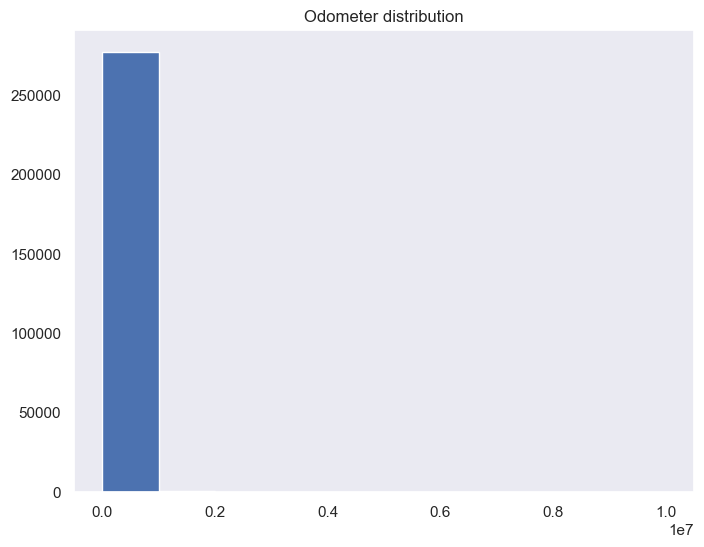

In [25]:
#check the odometer column for outliers
fig,ax=plt.subplots(figsize=(8,6))
df2.odometer.hist()
plt.title('Odometer distribution')
plt.grid(False)

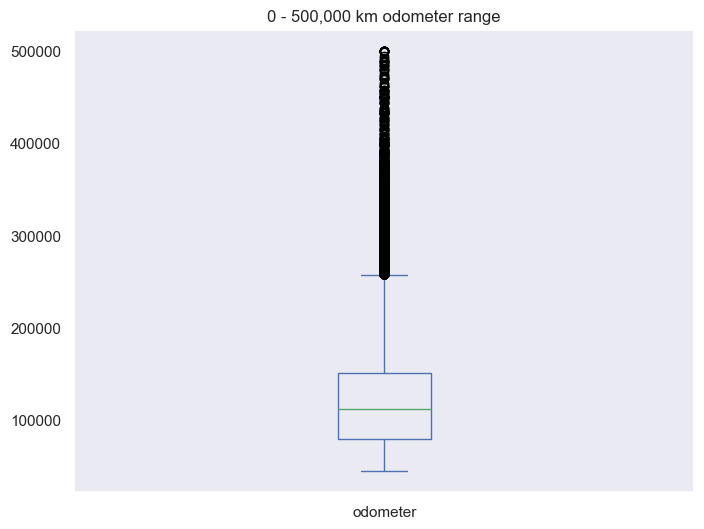

In [26]:
#filter data for odometer between 0 miles and 500,000 km
df3 = df2.loc[(df2.odometer >= 45_000) & (df2.odometer <= 500_000)]
fig,(ax)=plt.subplots(figsize=(8,6))
df3.odometer.plot(kind='box')
ax.set_title('0 - 500,000 km odometer range')
plt.grid(None)

In [27]:
df3.shape

(191279, 20)

In [28]:
#save new dataset and load
df3.to_csv('vehicles2_cleaned.csv',index=False)
import pandas as pd
data = pd.read_csv('vehicles2_cleaned.csv')
data.head()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,condition,cylinders,drive,type,paint_color,state,image_url,lat,long,posting_date,postmd
0,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,good,8 cylinders,NaN,pickup,white,al,https://images.craigslist.org/00R0R_lwWjXSEWNa...,32.5900,-85.4800,2021-05-04T12:31:18-0500,May-04
1,auburn,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,good,8 cylinders,NaN,pickup,blue,al,https://images.craigslist.org/00R0R_lwWjXSEWNa...,32.5900,-85.4800,2021-05-04T12:31:08-0500,May-04
2,auburn,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,excellent,6 cylinders,rwd,truck,black,al,https://images.craigslist.org/00404_l4loxHvdQe...,32.5920,-85.5189,2021-05-03T14:02:03-0500,May-03
3,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,gas,68696.0,clean,other,good,8 cylinders,4wd,pickup,black,al,https://images.craigslist.org/00V0V_ftJbKrOgdi...,32.5900,-85.4800,2021-05-03T13:41:25-0500,May-03
4,auburn,4500,1992.0,jeep,cherokee,gas,192000.0,clean,automatic,excellent,6 cylinders,4wd,NaN,NaN,al,https://images.craigslist.org/01010_7EM2aot64G...,32.6454,-85.3783,2021-05-03T07:38:05-0500,May-03


Check null values

In [29]:
data.isna().sum()

region              0
price               0
year                0
manufacturer     5542
model               0
fuel                0
odometer            0
title_status     1494
transmission        0
condition       47036
cylinders       34423
drive           19828
type            16106
paint_color     23973
state               0
image_url           0
lat               435
long              435
posting_date        0
postmd              0
dtype: int64

# EDA

Posting date column

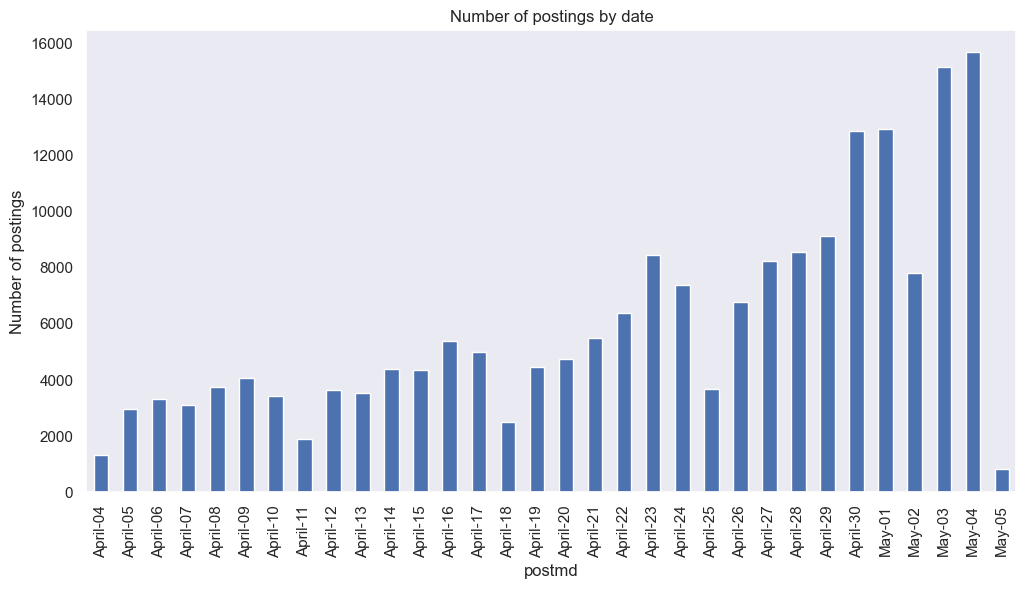

In [30]:
# Check number of listings for each day of data entry
fig,ax=plt.subplots(figsize=(12,6))
sns.set()
data.postmd.value_counts().sort_index().plot(kind='bar')
plt.ylabel('Number of postings')
plt.title('Number of postings by date')
plt.grid(None)

It looks like the number of postings increased by about 15,000 in a month (4th April to 4th May)

State column

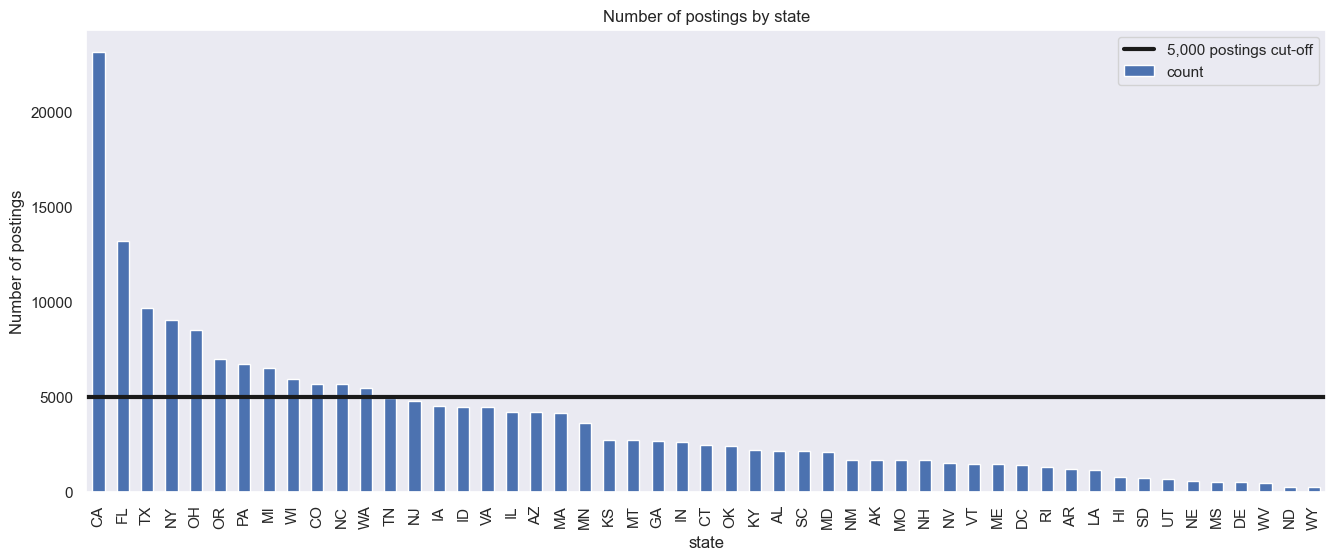

In [31]:
# Check number of postings per state
fig,ax=plt.subplots(figsize=(16,6))
data.state.str.upper().value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of postings')
plt.title('Number of postings by state')
y=[5000,5000]
x=[-1,100]
_=plt.plot(x,y,color='k',label='5,000 postings cut-off',linewidth=3)
_=plt.legend()
plt.grid(None)

In [33]:
# Filter out the states with <5000 used car postings
datav2 = data.loc[~(data.state.isin(['tn', 'nj', 'ia', 'id', 'va', 'il', 'az', 'ma', 'mn', 'ks', 'mt', 'ga',
       'in', 'ct', 'ok', 'ky', 'al', 'sc', 'md', 'nm', 'ak', 'mo', 'nh', 'nv',
       'vt', 'me', 'dc', 'ri', 'ar', 'la', 'hi', 'sd', 'ut', 'ne', 'ms', 'de',
       'wv', 'nd', 'wy']))]
datav2.shape

(106753, 20)

Manufacturers column

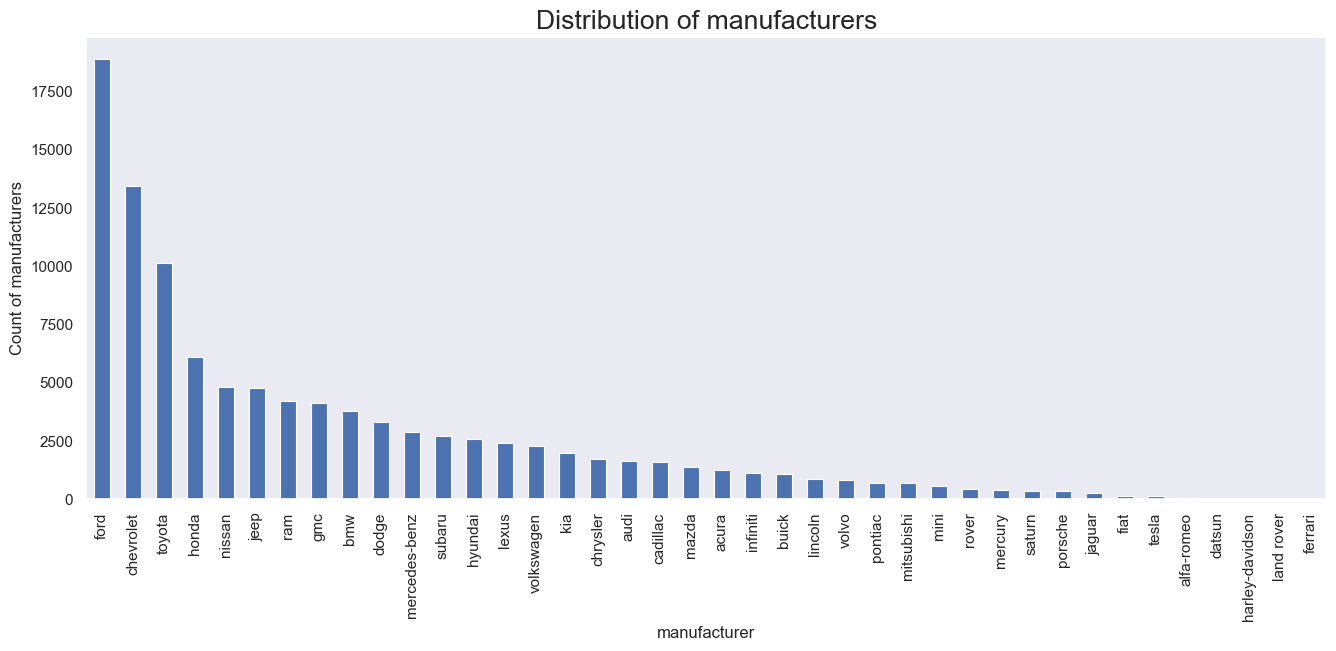

In [34]:
#check the distribution of manufacturers 
fig,ax=plt.subplots(figsize=(16,6))
sns.set_context('paper',font_scale=2)
datav2.manufacturer.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count of manufacturers')
plt.title('Distribution of manufacturers')
plt.grid(False)

The top 3 most popularl listed used car manufacturers are ford, chevrolet, and toyota while the least 3 are land rover, aston martin, and datsun.

Condition column

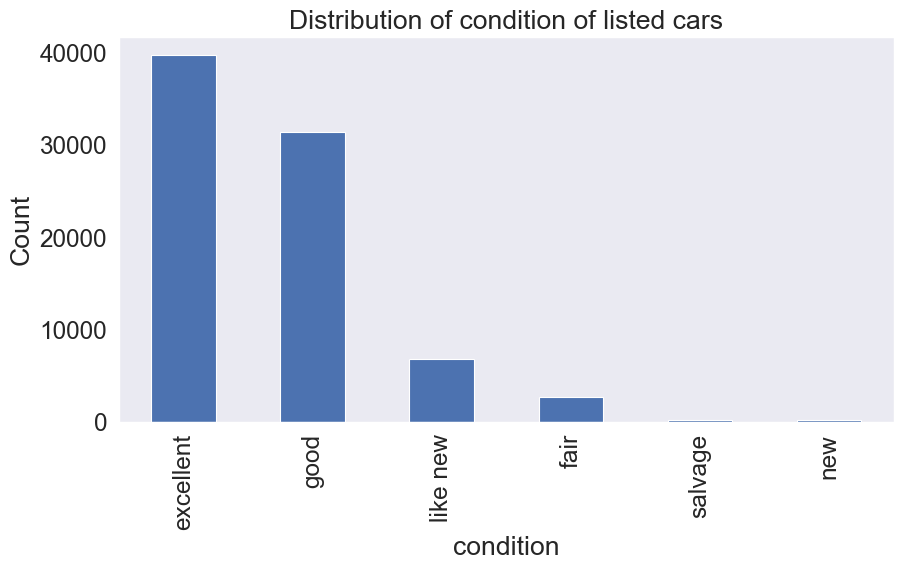

In [35]:
#check the condition of the listed used cars 
fig,ax=plt.subplots(figsize=(10,5))
datav2.condition.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Distribution of condition of listed cars')
plt.grid(None)

Most of the listed cars are in either good or excellent condition. This increases the marketability of the listed cars to buyers.

Cylinder column

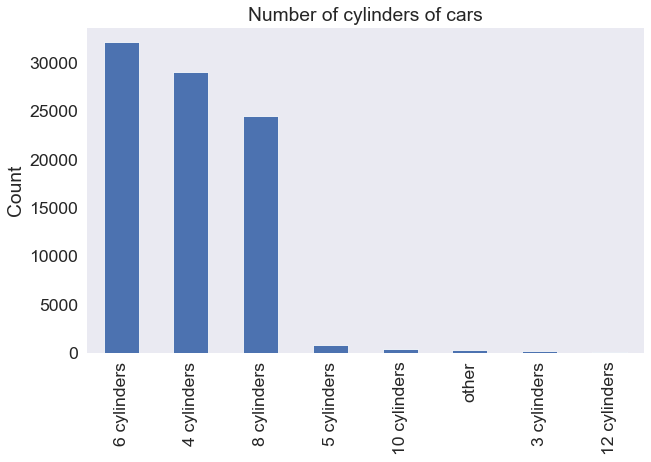

In [37]:
#check the number of cylinders of the listed used cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.cylinders.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Number of cylinders of cars')
plt.grid(None)

Cars with 4, 6, and 8 cylinders are the most popular listed posting on craigslist. This is expected because most cars are equipped with cylinders in that range.

Fuel column

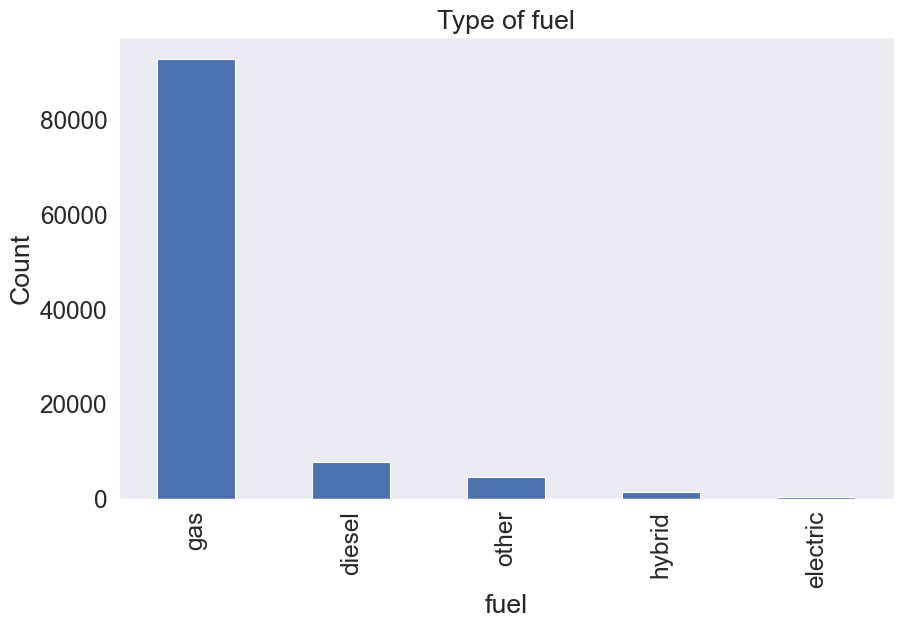

In [36]:
#check the fuel type used for listed used cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.fuel.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Type of fuel')
plt.grid(None)

As expected, gas (petrol) is the most common type of fuel for the listed cars.

Odometer column

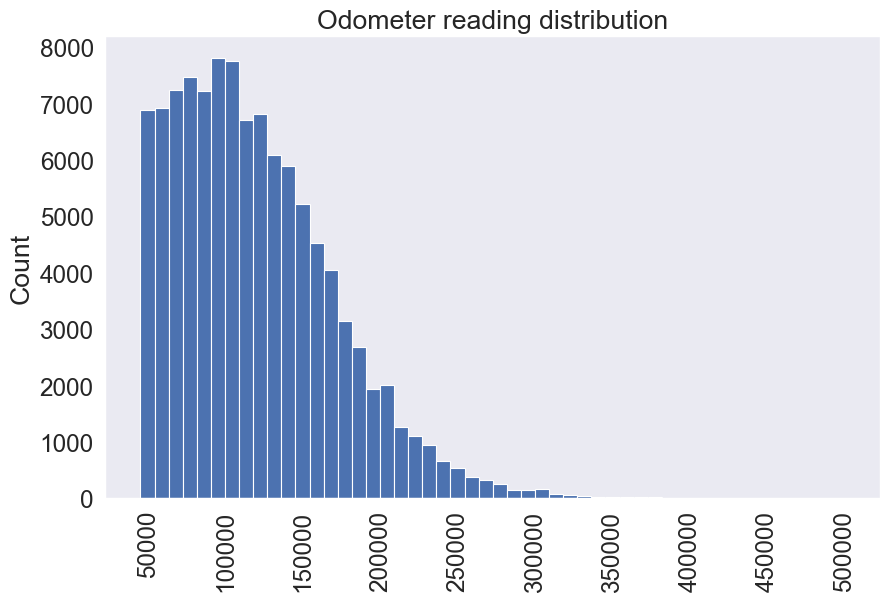

In [37]:
#check the odometer range for the listed cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.odometer.hist(bins=50)
plt.ylabel('Count')
plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50000))

plt.title('Odometer reading distribution')
plt.grid(None)

The bulk of the used cars odometer reading is clustered around 45,000 - 175,000 km

Title_status column

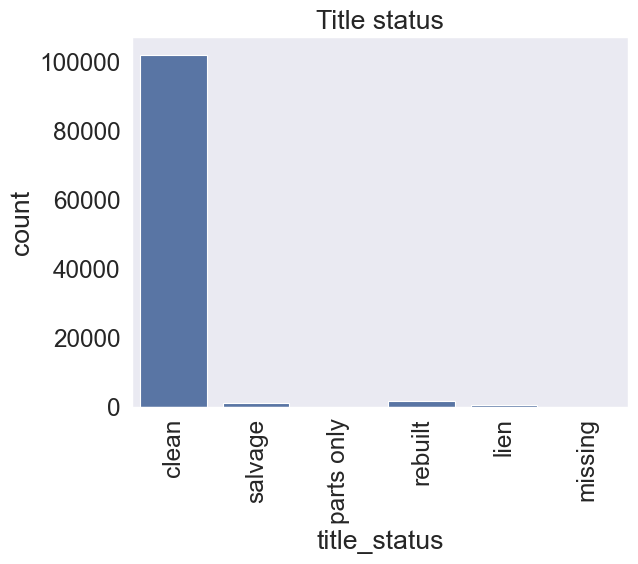

In [38]:
#check the title stutus column
sns.countplot(x='title_status',data=datav2)
plt.title('Title status')
plt.xticks(rotation=90)
plt.grid([])

Clean is the most occuring title status for the used car listings

Transmission column

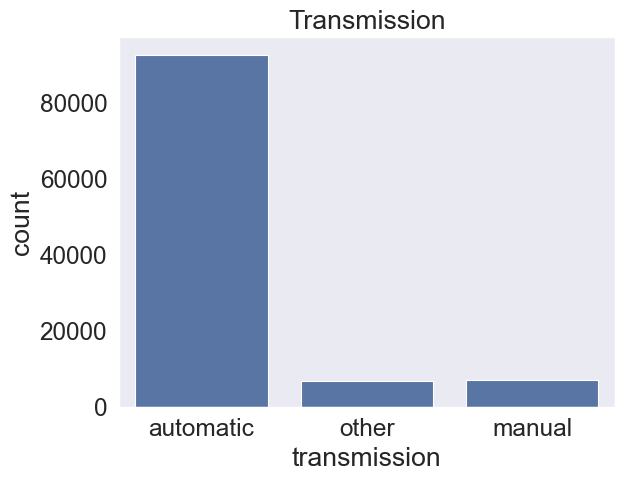

In [39]:
#check the transmission column
sns.countplot(x='transmission',data=datav2)
plt.title('Transmission')
plt.grid([])

The most common car transmission type is automatic as expected.

Drive column

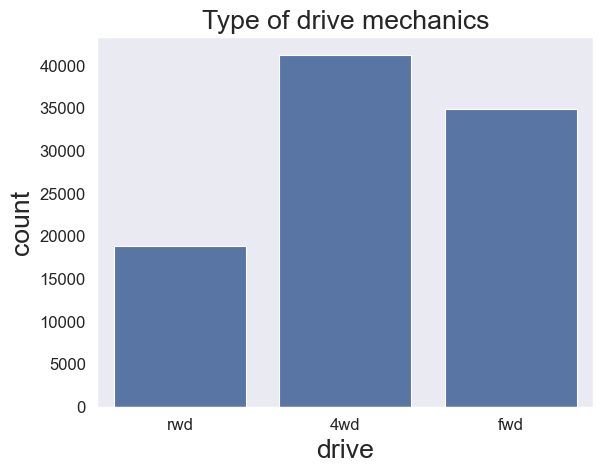

In [40]:
#check the drive column
sns.countplot(x='drive',data=datav2)
plt.title('Type of drive mechanics')
plt.tick_params(labelsize=12)
plt.grid([])

There are more fwd and 4wd vehicles than rwd. Front-wheel drives are standarad for many cars, crossovers, and SUVs while 4wd's, designed for severe off-road conditions, are common in most trucks and large SUVs. Rear-wheel drives are are also common in trucks and SUVs.

Car type column

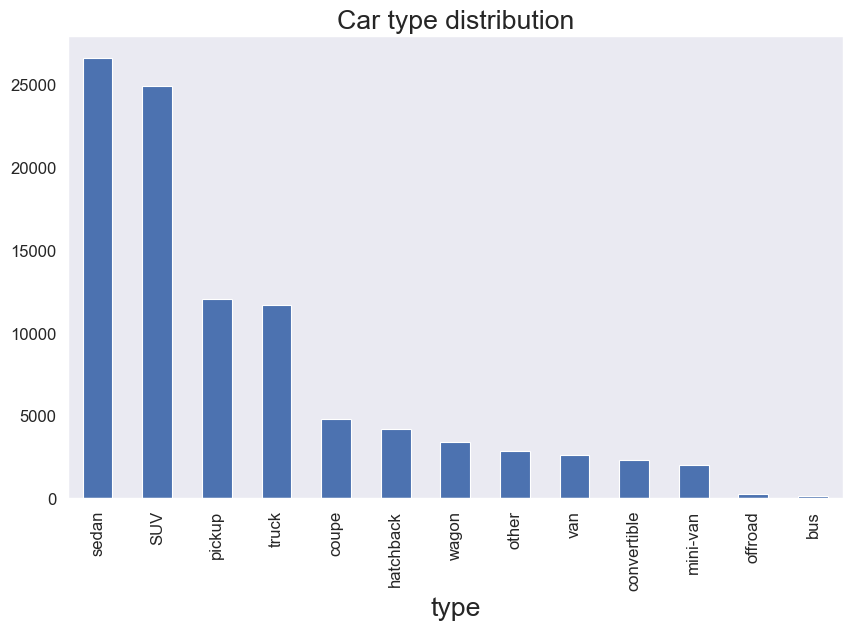

In [41]:
#check the car type distribution
plt.figure(figsize=(10,6))
datav2.type.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Car type distribution')
plt.tick_params(labelsize=12)
plt.grid([])

Sedans, SUVs are the two most popular car listings followed by pickups and trucks.

Car color column

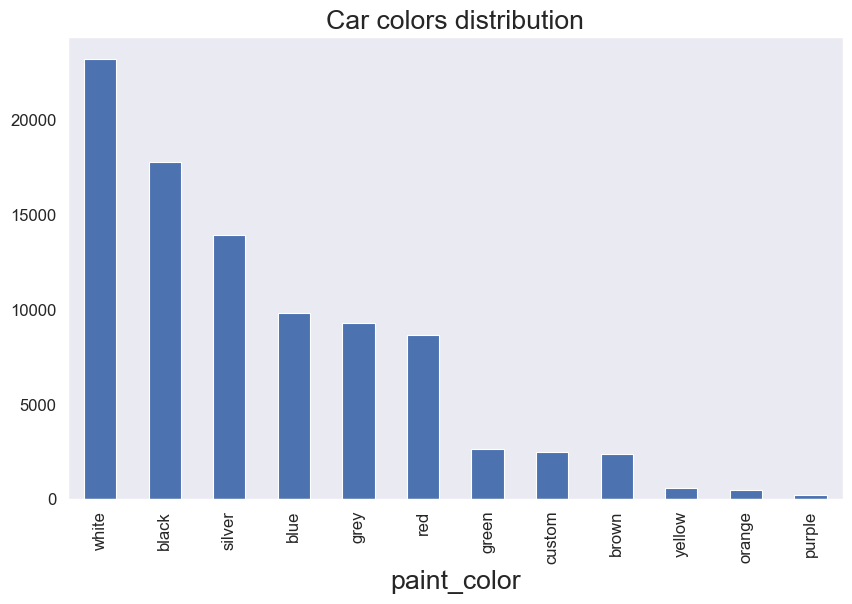

In [42]:
#check the car color distribution
plt.figure(figsize=(10,6))
datav2.paint_color.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Car colors distribution')
plt.tick_params(labelsize=12)
plt.grid([])

White and black are the two most popular colors of cars being listed, followed closely by silver.
Blue, red, and grey are the 3 next popular car colors.

In [43]:
#save data to new file
datav2.to_csv('vehicles2_EDA.csv', index=False)
data = pd.read_csv('vehicles2_EDA.csv')

# Feature Engineering

In [46]:
#convert the year column from 'float64' to year type as 'int64'
data['year']=pd.to_datetime(data['year'],errors='ignore',format='%y')

C:\Users\jeple\AppData\Local\Temp\ipykernel_19772\1590077202.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['year']=pd.to_datetime(data['year'],errors='ignore',format='%y')


C:\Users\jeple\AppData\Local\Temp\ipykernel_19772\2809656228.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year',data=data,palette='Blues',dodge=False)


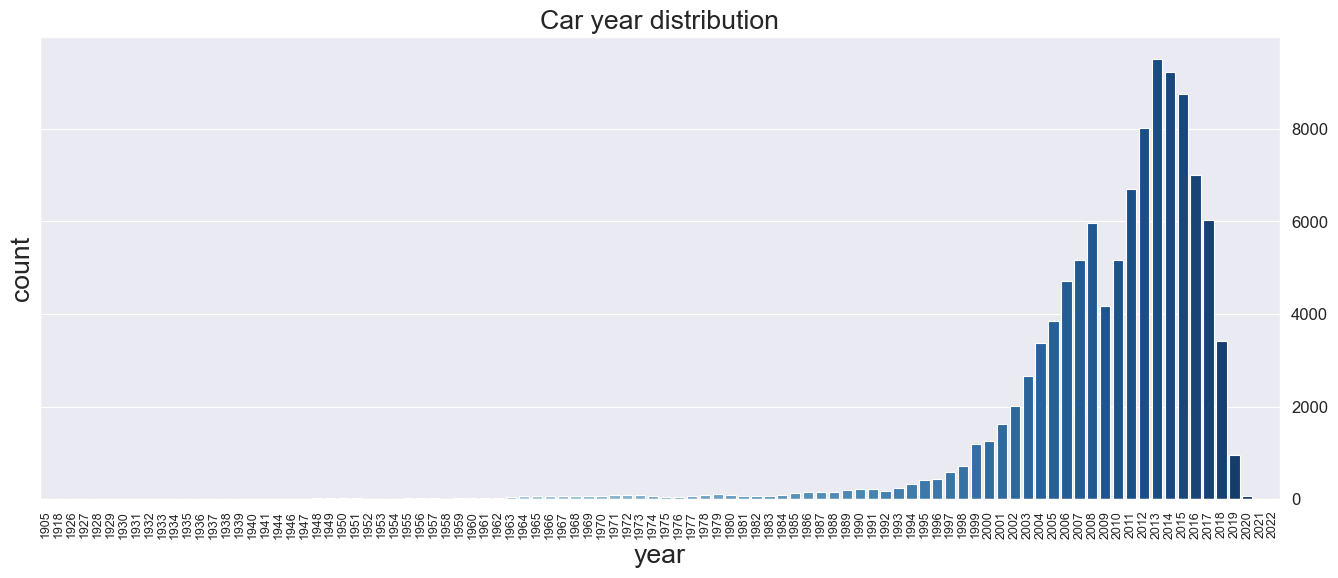

In [47]:
#check the car year distribution
plt.figure(figsize=(16,6))
sns.countplot(x='year',data=data,palette='Blues',dodge=False)
plt.title('Car year distribution')
plt.tick_params(labelsize=12)
plt.xticks(fontsize=9,rotation=90)
plt.tick_params(axis='y', labelleft=False, labelright=True)
plt.show()


The majority of the used cars model year come from between 2011 - 2020. It seems sellers tend to sell their cars within 10 years of ownership.

Distinguish older cars from newer ones. Create two new columns: age of cars by year, and average mileage of car per year

C:\Users\jeple\AppData\Local\Temp\ipykernel_19772\3306357973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age',data=data,palette='Blues_r')


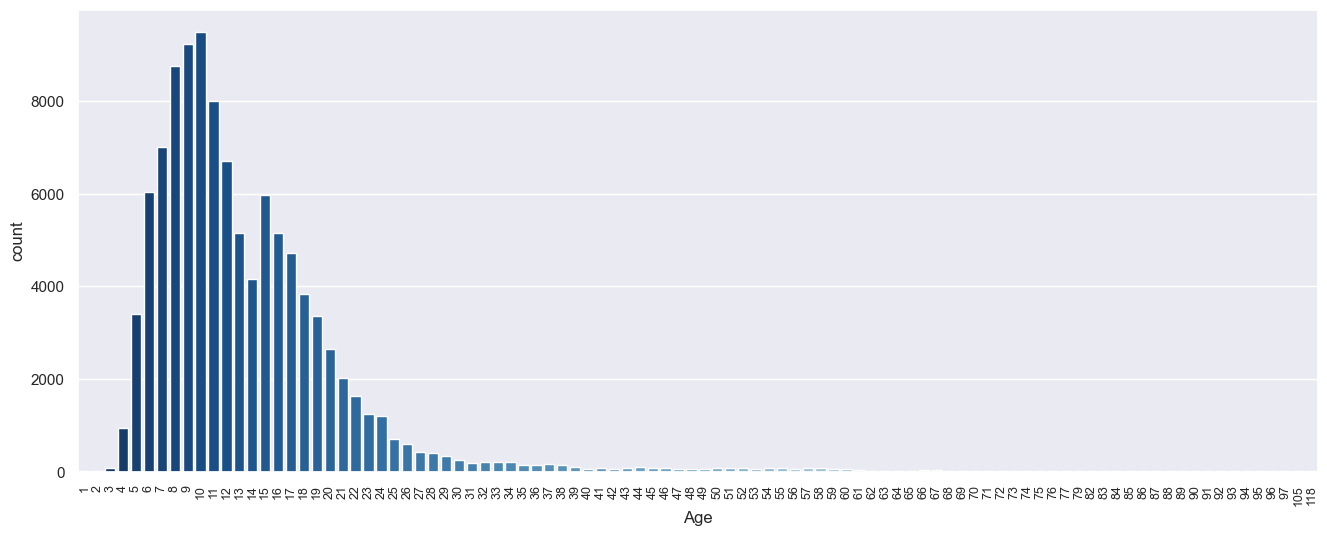

In [48]:
#create Age column
data['Age'] = 2022 - (data['year']-1)
#plot Age distribution
plt.figure(figsize=(16,6))
sns.set()
sns.countplot(x='Age',data=data,palette='Blues_r')
plt.xticks(fontsize=9,rotation=90)
plt.show()

In [49]:
#take out the 0-1 year old cars
data = data.loc[~(data.Age < 2)]

In [50]:
#create average mileage per year column
data['avg_mil'] = data['odometer'] / data['Age']
data['avg_mil']

0              10350.0
1             10126.85
2             7536.375
3              11000.0
4          1196.078431
              ...     
106748          8243.0
106749     8183.333333
106750     2742.424242
106751    11589.428571
106752        10562.25
Name: avg_mil, Length: 106751, dtype: object

Create a column to classify whether each car's average mileage per year is below or above the average of 13,500 miles (21,500 km) in the US

In [51]:
#create milage rating column
data['mil_rating'] = "below average"
data.loc[data['avg_mil'] > 21500, 'mil_rating'] = "above average"

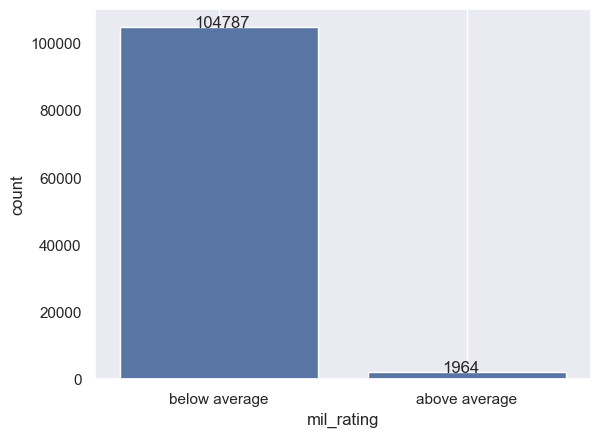

In [52]:
#plot the chart of mileage rating
ax = sns.countplot(x='mil_rating',data=data)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.01))
plt.grid()
plt.show()

Most of the cars have a yearly mileage below the average of 21,500 km per year

In [53]:
#save data to new file
data.to_csv('vehicles2_cleaned_v2.csv',index=False)
data = pd.read_csv('vehicles2_cleaned_v2.csv')

In [56]:
#more data cleaning

In [54]:
#check for null values
data.isna().sum()

region              0
price               0
year                0
manufacturer     2911
model               0
fuel                0
odometer            0
title_status     1021
transmission        0
condition       25824
cylinders       19551
drive           11721
type             9022
paint_color     15199
state               0
image_url           0
lat               149
long              149
posting_date        0
postmd              0
Age                 0
avg_mil             0
mil_rating          0
dtype: int64

In [55]:
#drop missing values in manufacturer column
data.dropna(subset=['manufacturer'],axis=0,inplace=True)

In [56]:
#print unique manufacturer entries
data.manufacturer.unique()

array(['harley-davidson', 'chevrolet', 'mini', 'pontiac', 'volkswagen',
       'lexus', 'nissan', 'toyota', 'ram', 'acura', 'ford', 'kia',
       'honda', 'fiat', 'mercedes-benz', 'gmc', 'infiniti', 'bmw',
       'hyundai', 'tesla', 'jeep', 'subaru', 'mitsubishi', 'dodge',
       'audi', 'cadillac', 'chrysler', 'datsun', 'volvo', 'mazda',
       'porsche', 'lincoln', 'buick', 'rover', 'jaguar', 'mercury',
       'alfa-romeo', 'saturn', 'land rover', 'ferrari'], dtype=object)

In [57]:
#create manufacturer countries, 'Made', column
data_copy = data.copy()
def country(row):
  if row['manufacturer'] in ['harley-davidson', 'chevrolet', 'pontiac', 'ram', 'ford', 'gmc', 'tesla', 'jeep', 'dodge',
                             'cadillac', 'chrysler', 'lincoln', 'buick', 'saturn', 'mercury']:
    val = 'American'
  elif (row['manufacturer'] in ['lexus', 'nissan', 'toyota', 'acura', 'honda', 'infiniti', 'subaru', 'mitsubishi', 
                                'datsun', 'mazda']):
    val = 'Japanese'
  elif (row['manufacturer'] in ['volkswagen', 'mercedes-benz', 'bmw', 'audi', 'porsche']):
    val = 'German'
  elif (row['manufacturer'] in ['ferrari','fiat','alfa-romeo']):
    val = 'Italian'
  elif (row['manufacturer'] in ['kia','hyundai']):
    val = 'Korean'
  elif (row['manufacturer'] in ['volvo']):
    val = 'Swedish'
  elif (row['manufacturer'] in ['rover','mini','land rover', 'jaguar']):
    val = 'English'
  return val
data_copy['Made'] = data_copy.apply(country, axis=1)
data_copy.head()  

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,condition,...,state,image_url,lat,long,posting_date,postmd,Age,avg_mil,mil_rating,Made
0,bakersfield,11975,2003,harley-davidson,davidson,gas,207000.0,clean,automatic,excellent,...,ca,https://images.craigslist.org/00F0F_eEBhgvA15M...,34.070612,-117.383384,2021-05-04T12:26:43-0700,May-04,20,10350.000000,below average,American
1,bakersfield,21950,2003,chevrolet,silverado 3500,diesel,202537.0,clean,automatic,excellent,...,ca,https://images.craigslist.org/00m0m_9owDGrPLWK...,33.794656,-117.992994,2021-05-04T12:04:51-0700,May-04,20,10126.850000,below average,American
2,bakersfield,15590,2015,mini,hardtop 2 door cooper s,other,60291.0,clean,other,good,...,ca,https://images.craigslist.org/00f0f_dGlIKGTKrJ...,35.380000,-119.020000,2021-05-04T11:41:15-0700,May-04,8,7536.375000,below average,English
3,bakersfield,3975,2006,pontiac,g6,gas,187000.0,clean,automatic,excellent,...,ca,https://images.craigslist.org/00V0V_5uw5gVZjSk...,34.070612,-117.383384,2021-05-04T11:35:04-0700,May-04,17,11000.000000,below average,American
4,bakersfield,8000,1972,chevrolet,chevelle,gas,61000.0,clean,automatic,fair,...,ca,https://images.craigslist.org/00U0U_gvATaIvxTn...,35.248476,-118.936316,2021-05-04T11:30:14-0700,May-04,51,1196.078431,below average,American


In [58]:
#drop lat and long columns
data_copy.drop(columns=['lat','long'],axis=1, inplace=True)

For the missing values in the remainder of the columns, substitute them with a random variable from its unique items based on their current probability.

In [59]:
#normalize the condition value counts and save into a dataframe
cond_prob = pd.DataFrame(list(data_copy.condition.value_counts(normalize=True).items()),columns = ['condition','prob'])
cond_prob

,condition,prob
0,excellent,0.494410
1,good,0.384997
2,like new,0.083649
3,fair,0.032863
4,salvage,0.002149
5,new,0.001932


In [60]:
#substitute missing values in condition to random states based on their probabilities
data_copy.loc[data_copy.condition.isna(), 'condition'] = np.random.choice(cond_prob.condition, 
                                                size=data_copy.condition.isna().sum(),
                                                replace=True, 
                                                p=cond_prob.prob)

In [61]:
#normalize the cylinders value counts and save into a dataframe
cyl_prob = pd.DataFrame(list(data_copy.cylinders.value_counts(normalize=True).items()),columns = ['cylinders','prob'])
#substitute missing values in cylinder to random states based on their probabilities
data_copy.loc[data_copy.cylinders.isna(), 'cylinders'] = np.random.choice(cyl_prob.cylinders, 
                                                size=data_copy.cylinders.isna().sum(),
                                                replace=True, 
                                                p=cyl_prob.prob)

In [62]:
#normalize the title status value counts and save into a dataframe
ts_prob = pd.DataFrame(list(data_copy.title_status.value_counts(normalize=True).items()),columns = ['ts','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.title_status.isna(), 'title_status'] = np.random.choice(ts_prob.ts, 
                                                size=data_copy.title_status.isna().sum(),
                                                replace=True, 
                                                p=ts_prob.prob)

In [63]:
#normalize the drive value counts and save into a dataframe
dr_prob = pd.DataFrame(list(data_copy.drive.value_counts(normalize=True).items()),columns = ['drive','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.drive.isna(), 'drive'] = np.random.choice(dr_prob.drive, 
                                                size=data_copy.drive.isna().sum(),
                                                replace=True, 
                                                p=dr_prob.prob)

In [64]:
#normalize the type value counts and save into a dataframe
type_prob = pd.DataFrame(list(data_copy.type.value_counts(normalize=True).items()),columns = ['type','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.type.isna(), 'type'] = np.random.choice(type_prob.type, 
                                                size=data_copy.type.isna().sum(),
                                                replace=True, 
                                                p=type_prob.prob)

In [65]:
#normalize the color value counts and save into a dataframe
pc_prob = pd.DataFrame(list(data_copy.paint_color.value_counts(normalize=True).items()),columns = ['color','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.paint_color.isna(), 'paint_color'] = np.random.choice(pc_prob.color, 
                                                size=data_copy.paint_color.isna().sum(),
                                                replace=True, 
                                                p=pc_prob.prob)

In [66]:
data_copy.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
condition       0
cylinders       0
drive           0
type            0
paint_color     0
state           0
image_url       0
posting_date    0
postmd          0
Age             0
avg_mil         0
mil_rating      0
Made            0
dtype: int64

Group car type and colors into larger groups

In [67]:
# classify car type
def luxury(car):
  if car['type'] in ['sedan', 'convertible','coupe','hatchback','other']:
    cal='luxury_small'
  elif (car['type'] in ['SUV','wagon']):
    cal='luxury_large'
  elif (car['type'] in ['pickup','truck','offroad']):
    cal='non-luxury_small'
  elif (car['type'] in ['van','mini-van','bus']):
    cal='non-luxury_large'
  return cal 
data_copy['type_group'] = data_copy.apply(luxury, axis=1)
data_copy.head() 

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,condition,...,paint_color,state,image_url,posting_date,postmd,Age,avg_mil,mil_rating,Made,type_group
0,bakersfield,11975,2003,harley-davidson,davidson,gas,207000.0,clean,automatic,excellent,...,black,ca,https://images.craigslist.org/00F0F_eEBhgvA15M...,2021-05-04T12:26:43-0700,May-04,20,10350.000000,below average,American,non-luxury_small
1,bakersfield,21950,2003,chevrolet,silverado 3500,diesel,202537.0,clean,automatic,excellent,...,grey,ca,https://images.craigslist.org/00m0m_9owDGrPLWK...,2021-05-04T12:04:51-0700,May-04,20,10126.850000,below average,American,non-luxury_small
2,bakersfield,15590,2015,mini,hardtop 2 door cooper s,other,60291.0,clean,other,good,...,red,ca,https://images.craigslist.org/00f0f_dGlIKGTKrJ...,2021-05-04T11:41:15-0700,May-04,8,7536.375000,below average,English,luxury_small
3,bakersfield,3975,2006,pontiac,g6,gas,187000.0,clean,automatic,excellent,...,silver,ca,https://images.craigslist.org/00V0V_5uw5gVZjSk...,2021-05-04T11:35:04-0700,May-04,17,11000.000000,below average,American,luxury_small
4,bakersfield,8000,1972,chevrolet,chevelle,gas,61000.0,clean,automatic,fair,...,white,ca,https://images.craigslist.org/00U0U_gvATaIvxTn...,2021-05-04T11:30:14-0700,May-04,51,1196.078431,below average,American,non-luxury_large


In [68]:
# classify car color
def color(paint):
  if paint['paint_color'] in ['white','silver','yellow','orange','green','custom']:
    col='light color'
  elif (paint['paint_color'] in ['black','red','blue','purple','grey','brown']):
    col='dark color'
  return col 
data_copy['color_group'] = data_copy.apply(color, axis=1)
data_copy.head() 

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,condition,...,state,image_url,posting_date,postmd,Age,avg_mil,mil_rating,Made,type_group,color_group
0,bakersfield,11975,2003,harley-davidson,davidson,gas,207000.0,clean,automatic,excellent,...,ca,https://images.craigslist.org/00F0F_eEBhgvA15M...,2021-05-04T12:26:43-0700,May-04,20,10350.000000,below average,American,non-luxury_small,dark color
1,bakersfield,21950,2003,chevrolet,silverado 3500,diesel,202537.0,clean,automatic,excellent,...,ca,https://images.craigslist.org/00m0m_9owDGrPLWK...,2021-05-04T12:04:51-0700,May-04,20,10126.850000,below average,American,non-luxury_small,dark color
2,bakersfield,15590,2015,mini,hardtop 2 door cooper s,other,60291.0,clean,other,good,...,ca,https://images.craigslist.org/00f0f_dGlIKGTKrJ...,2021-05-04T11:41:15-0700,May-04,8,7536.375000,below average,English,luxury_small,dark color
3,bakersfield,3975,2006,pontiac,g6,gas,187000.0,clean,automatic,excellent,...,ca,https://images.craigslist.org/00V0V_5uw5gVZjSk...,2021-05-04T11:35:04-0700,May-04,17,11000.000000,below average,American,luxury_small,light color
4,bakersfield,8000,1972,chevrolet,chevelle,gas,61000.0,clean,automatic,fair,...,ca,https://images.craigslist.org/00U0U_gvATaIvxTn...,2021-05-04T11:30:14-0700,May-04,51,1196.078431,below average,American,non-luxury_large,light color


In [69]:
#save data file and load
data_copy.to_csv('vehicles2_FE.csv',index=False)

# Modelling

In [70]:
import pandas as pd
import numpy as np
df = pd.read_csv('vehicles2_FE.csv')
df.drop(['image_url','posting_date','mil_rating','Made','type_group'
         ,'color_group','postmd','avg_mil','region','state'],axis=1,inplace=True)

In [71]:
df.cylinders.value_counts()

cylinders
6 cylinders     38377
4 cylinders     34361
8 cylinders     29118
5 cylinders       960
10 cylinders      514
other             345
3 cylinders       129
12 cylinders       36
Name: count, dtype: int64

In [72]:
import seaborn as sns
df.cylinders.replace("other",np.nan,inplace=True)
df.cylinders.value_counts()

C:\Users\jeple\AppData\Local\Temp\ipykernel_19772\3881209403.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.cylinders.replace("other",np.nan,inplace=True)


cylinders
6 cylinders     38377
4 cylinders     34361
8 cylinders     29118
5 cylinders       960
10 cylinders      514
3 cylinders       129
12 cylinders       36
Name: count, dtype: int64

In [73]:
#normalize the cylinders value counts and save into a dataframe
cyl_prob = pd.DataFrame(list(df.cylinders.value_counts(normalize=True).items()),columns = ['cylinders','prob'])
#substitute missing values in cylinder to random states based on their probabilities
df.loc[df.cylinders.isna(), 'cylinders'] = np.random.choice(cyl_prob.cylinders, 
                                                size=df.cylinders.isna().sum(),
                                                replace=True, 
                                                p=cyl_prob.prob)

In [74]:
df.cylinders.value_counts()

cylinders
6 cylinders     38504
4 cylinders     34462
8 cylinders     29227
5 cylinders       964
10 cylinders      516
3 cylinders       131
12 cylinders       36
Name: count, dtype: int64

In [75]:
#since cylinder has the word 'cylinder' after the number, we remove it and make it numerical
df['cylinders']=df['cylinders'].apply(lambda x:x.split(' ')[0])
df['cylinders']=df['cylinders'].astype('int')
df['cylinders'].dtype

dtype('int64')

In [76]:
cols=['odometer','cylinders']

In [77]:
#further remove outliers in odometer for model purposes
def find_outliers_limit(df,col):
    print(col)
    print('-'*50)
    #removing outliers
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper
def remove_outlier(df,col,upper,lower):
    # identify outliers
    outliers = [x for x in df[col] if x > upper or x < lower]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df[col] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    final= np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return final
outlier_cols=['odometer']
for col in outlier_cols:
    lower,upper=find_outliers_limit(df,col)
    df[col]=remove_outlier(df,col,upper,lower)

odometer
--------------------------------------------------
Percentiles: 25th=79393.000, 75th=150000.000, IQR=70607.000
Lower: -26517.5  Upper: 255910.5
Identified outliers: 1653
Non-outlier observations: 102187


Handling categorical columns
We convert categorical columns to numerical values using scikit learn OrdinalEncoder

In [78]:
# Loading Libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import datetime
from sklearn.ensemble import RandomForestRegressor

Prepare data for modeling by handling categorical features

In [79]:
#select numerical and categorical data
num_df=df.select_dtypes(include=np.number)
cat_df=df.select_dtypes(include=object)
#assign encoder
encoding=OrdinalEncoder()
#place categorical columns to list and encode
cat_cols=cat_df.columns.tolist()
encoding.fit(cat_df[cat_cols])
#transform categorical encoding and place in dataframe
cat_oe=encoding.transform(cat_df[cat_cols])
cat_oe=pd.DataFrame(cat_oe,columns=cat_cols)
cat_df.reset_index(inplace=True,drop=True)

cat_oe.head()

num_df.reset_index(inplace=True,drop=True)

cat_oe.reset_index(inplace=True,drop=True)

final_all_df=pd.concat([num_df,cat_oe],axis=1)

<Axes: >

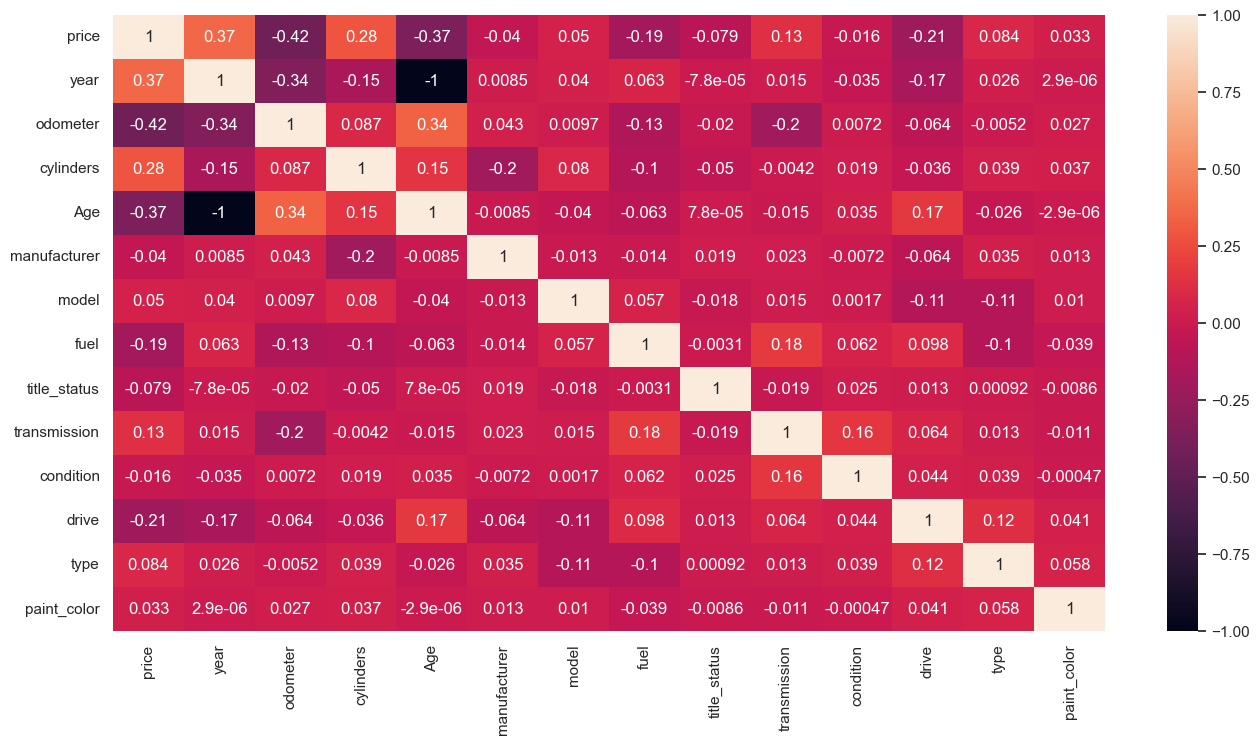

In [80]:
#plot the correlation matrix
plt.figure(figsize=(16,8))
sns.heatmap(data=final_all_df.corr(),annot=True)

In [81]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'condition', 'cylinders', 'drive',
       'type', 'paint_color', 'Age'],
      dtype='object')

In [82]:
data_reg = df.loc[:, ['price', 'year', 'Age', 'odometer','cylinders','manufacturer', 'model', 'fuel', 
                      'title_status', 'transmission', 'condition',  'drive',
                      'type', 'paint_color']]
label_reg = data_reg
data_reg_original = data_reg
data_reg.head()

,price,year,Age,odometer,cylinders,manufacturer,model,fuel,title_status,transmission,condition,drive,type,paint_color
0,11975,2003,20,207000.0,8,harley-davidson,davidson,gas,clean,automatic,excellent,rwd,pickup,black
1,21950,2003,20,202537.0,8,chevrolet,silverado 3500,diesel,clean,automatic,excellent,4wd,truck,grey
2,15590,2015,8,60291.0,8,mini,hardtop 2 door cooper s,other,clean,other,good,fwd,hatchback,red
3,3975,2006,17,187000.0,4,pontiac,g6,gas,clean,automatic,excellent,fwd,sedan,silver
4,8000,1972,51,61000.0,8,chevrolet,chevelle,gas,clean,automatic,fair,rwd,mini-van,white


Label Encoding
#using LabelEncoder to convert categorical values to assign numerical values or the model

In [83]:
label_reg = data_reg

le_manufacturer = LabelEncoder()
le_model = LabelEncoder()
le_fuel = LabelEncoder()
le_title_status = LabelEncoder()
le_transmission = LabelEncoder()
le_condition = LabelEncoder()
le_drive = LabelEncoder()
le_type = LabelEncoder()
le_color = LabelEncoder()

label_reg["type"] = le_type.fit_transform(label_reg['type'])
label_reg["manufacturer"] = le_manufacturer.fit_transform(label_reg['manufacturer'])
label_reg['paint_color'] = le_color.fit_transform(label_reg['paint_color'])
label_reg['drive'] = le_drive.fit_transform(label_reg['drive'])
label_reg["fuel"] = le_fuel.fit_transform(label_reg['fuel'])
label_reg["title_status"] = le_title_status.fit_transform(label_reg['title_status'])
label_reg['transmission'] = le_transmission.fit_transform(label_reg['transmission'])
label_reg['condition'] = le_condition.fit_transform(label_reg['condition'])
label_reg['model'] = le_model.fit_transform(label_reg['model'])

label_reg.head()

,price,year,Age,odometer,cylinders,manufacturer,model,fuel,title_status,transmission,condition,drive,type,paint_color
0,11975,2003,20,207000.0,8,14,3316,2,0,0,0,2,8,0
1,21950,2003,20,202537.0,8,6,8732,0,0,0,0,0,10,5
2,15590,2015,8,60291.0,8,27,5715,4,0,2,2,1,4,8
3,3975,2006,17,187000.0,4,30,5387,2,0,0,0,1,9,9
4,8000,1972,51,61000.0,8,6,2552,2,0,0,1,2,5,10


Split the data into train and test data in an 80-20 split.

In [84]:
X_regla = label_reg.drop('price', axis = 1)
y_regla = label_reg['price']

X_train, X_test, y_train, y_test = train_test_split(X_regla, y_regla, test_size = 0.2, random_state = 25)


Random Forest Algorithm

In [85]:
random_forest = RandomForestRegressor(n_estimators = 250, max_features = 'sqrt', n_jobs = 20)
random_forest.fit(X_train, y_train.values.ravel())
print(random_forest.score(X_train, y_train), random_forest.score(X_test, y_test))

0.9833166595437235 0.8813765263736121


Model Evaluation

In [86]:
print('RandomForestRegressor Accuracy Evaluation')
print(f'r2 score: {r2_score(y_test, random_forest.predict(X_test))}')
print(f'Mean absolute error: {mean_absolute_error(y_test, random_forest.predict(X_test))}')
print(f'Mean squared error: {mean_squared_error(y_test, random_forest.predict(X_test))}')
print(f'Mean absolute percentage error: {mean_absolute_percentage_error(y_test, random_forest.predict(X_test))}')

RandomForestRegressor Accuracy Evaluation
r2 score: 0.8813765263736121
Mean absolute error: 2202.932302316398
Mean squared error: 16218038.313276377
Mean absolute percentage error: 0.256827830808682


In [87]:
import joblib
joblib.dump(random_forest, 'final_RFModel.pkl' )

['final_RFModel.pkl']